### Model Selection

In [392]:
library(ISLR)

In [393]:
#baseball stats, w/ response var == salary
#many missing values
summary(Hitters)

     AtBat            Hits           HmRun            Runs       
 Min.   : 19.0   Min.   :  1.0   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:282.5   1st Qu.: 71.5   1st Qu.: 5.00   1st Qu.: 33.50  
 Median :413.0   Median :103.0   Median : 9.00   Median : 52.00  
 Mean   :403.6   Mean   :107.8   Mean   :11.62   Mean   : 54.75  
 3rd Qu.:526.0   3rd Qu.:141.5   3rd Qu.:18.00   3rd Qu.: 73.00  
 Max.   :687.0   Max.   :238.0   Max.   :40.00   Max.   :130.00  
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 30.00   1st Qu.: 23.00   1st Qu.: 4.000   1st Qu.:  842.5  
 Median : 47.00   Median : 37.00   Median : 6.000   Median : 1931.0  
 Mean   : 51.49   Mean   : 41.11   Mean   : 7.312   Mean   : 2657.5  
 3rd Qu.: 71.00   3rd Qu.: 57.00   3rd Qu.:10.000   3rd Qu.: 3890.5  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0  
     CHits            CHmRun           CRuns    

In [394]:
str(Hitters)

'data.frame':	263 obs. of  20 variables:
 $ AtBat    : int  315 479 496 321 594 185 298 323 401 574 ...
 $ Hits     : int  81 130 141 87 169 37 73 81 92 159 ...
 $ HmRun    : int  7 18 20 10 4 1 0 6 17 21 ...
 $ Runs     : int  24 66 65 39 74 23 24 26 49 107 ...
 $ RBI      : int  38 72 78 42 51 8 24 32 66 75 ...
 $ Walks    : int  39 76 37 30 35 21 7 8 65 59 ...
 $ Years    : int  14 3 11 2 11 2 3 2 13 10 ...
 $ CAtBat   : int  3449 1624 5628 396 4408 214 509 341 5206 4631 ...
 $ CHits    : int  835 457 1575 101 1133 42 108 86 1332 1300 ...
 $ CHmRun   : int  69 63 225 12 19 1 0 6 253 90 ...
 $ CRuns    : int  321 224 828 48 501 30 41 32 784 702 ...
 $ CRBI     : int  414 266 838 46 336 9 37 34 890 504 ...
 $ CWalks   : int  375 263 354 33 194 24 12 8 866 488 ...
 $ League   : Factor w/ 2 levels "A","N": 2 1 2 2 1 2 1 2 1 1 ...
 $ Division : Factor w/ 2 levels "E","W": 2 2 1 1 2 1 2 2 1 1 ...
 $ PutOuts  : int  632 880 200 805 282 76 121 143 0 238 ...
 $ Assists  : int  43 82 11 40 42

Predict the salaries of the baseball players

In [395]:
#missing values
NA_index <- is.na(Hitters)
length(Hitters[NA_index])

[1] 0

In [396]:
#deal w/ MISSING values
#easy way == elminate any row w/ missing value
#na.omit == does that for you 
#produces new DF that overides original 
#new df == less rows; no missing values

Hitters<-na.omit(Hitters)

#check if any missing values
#sum(is.na(Salary) == check if any NAs in variable salary
#we get 0 == what we expected
with(Hitters, sum(is.na(Salary)))

[1] 0

In [397]:

NA_index <- is.na(Hitters)

length(Hitters[NA_index])

[1] 0

In [42]:
nrow(Hitters)

[1] 263

In [43]:
ncol(Hitters)

[1] 20

### Best Subset  Regression 

looks through all possible regression modesl of all different subset sizes

then looks for best of each size

produces a sequence of models which is the best subset for each particular size 

In [398]:
#install.packages('leaps') 

In [2]:
#leaps == evaluate all best-subset models
library(leaps)

In [5]:
#data set in ISLR

#200 baseball players
#regsubsets == best subset modeling
regfit.full <- regsubsets(Salary~.,data=Hitters)

In [6]:
#got 19 variables
#puts asterisk next to vars for best subsets
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

gives by default best-subsets up to size 8

lets increase to 19, i.e., all the variables

In [7]:
#19 variables
regfit.full2 <- regsubsets(Salary~.,data=Hitters,nvmax=19)

In [9]:
reg.summary<- summary(regfit.full2)


reg.summary

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"

In [10]:
#gives R^2, adjusted, BIC, etc. statistics
#good for model selection 
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

Warning message in plot.window(...):
""xlap" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""xlap" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xlap" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xlap" is not a graphical parameter"
Warning message in box(...):
""xlap" is not a graphical parameter"
Warning message in title(...):
""xlap" is not a graphical parameter"


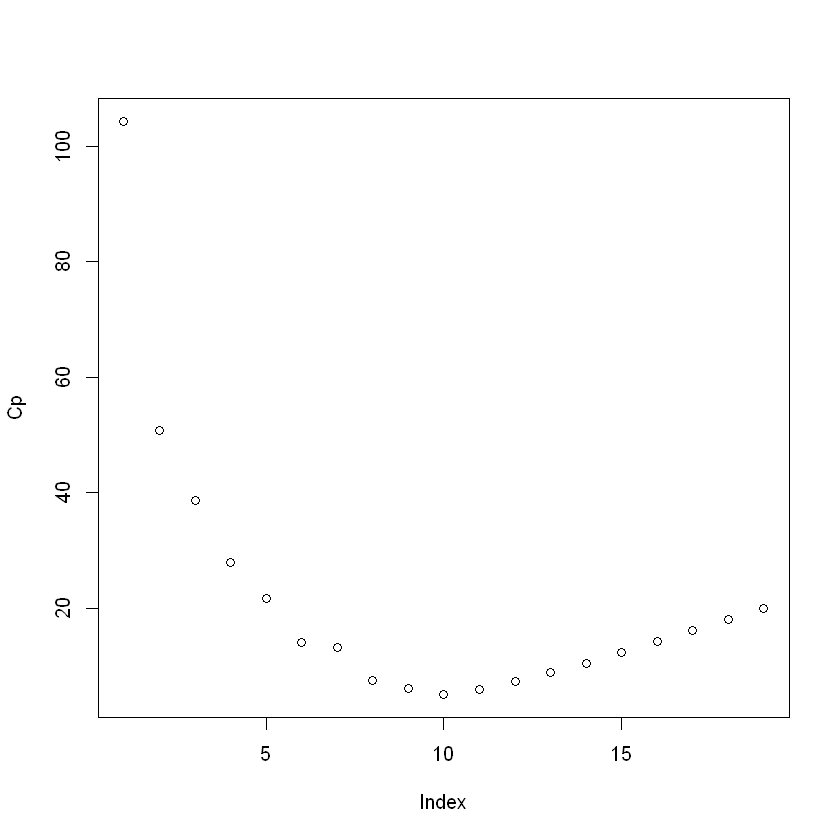

In [11]:
#plot cp component of ergsummary 
#cp == estimate of predictor error
#plotted against number of variables
#pick model with LOWEST CP

#model w/ 10 variables ideal here(smallest CP)
plot(reg.summary$cp,xlap='Number of Variables',ylab='Cp')

In [14]:
#show which is the minimum CP value by variables
which.min(reg.summary$cp)

[1] 10

Warning message in plot.window(...):
""xlap" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""xlap" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xlap" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xlap" is not a graphical parameter"
Warning message in box(...):
""xlap" is not a graphical parameter"
Warning message in title(...):
""xlap" is not a graphical parameter"


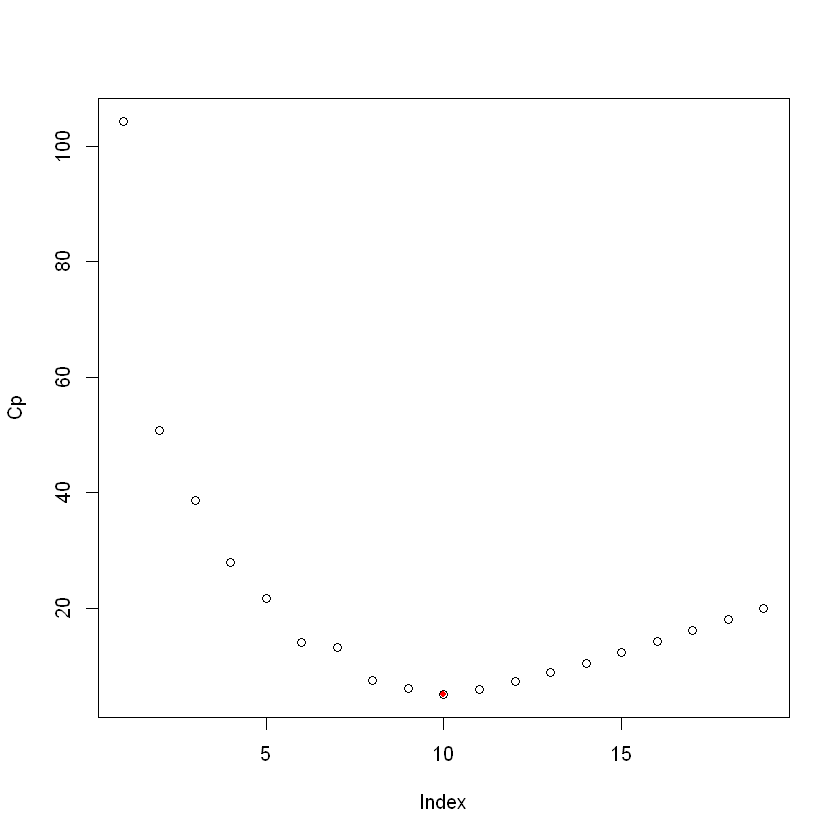

In [16]:
#color min CP in red
plot(reg.summary$cp,xlap='Number of Variables',ylab='Cp')

#10 == x
#reg.summary$cp[10] == y == cp == 5.00931724974294
points(10,reg.summary$cp[10],pch=20,col='red')

In [19]:
#what value is the cp min?
reg.summary$cp[10]

[1] 5.009317

In [20]:
#?points

Plot method for 'regsubsets' object

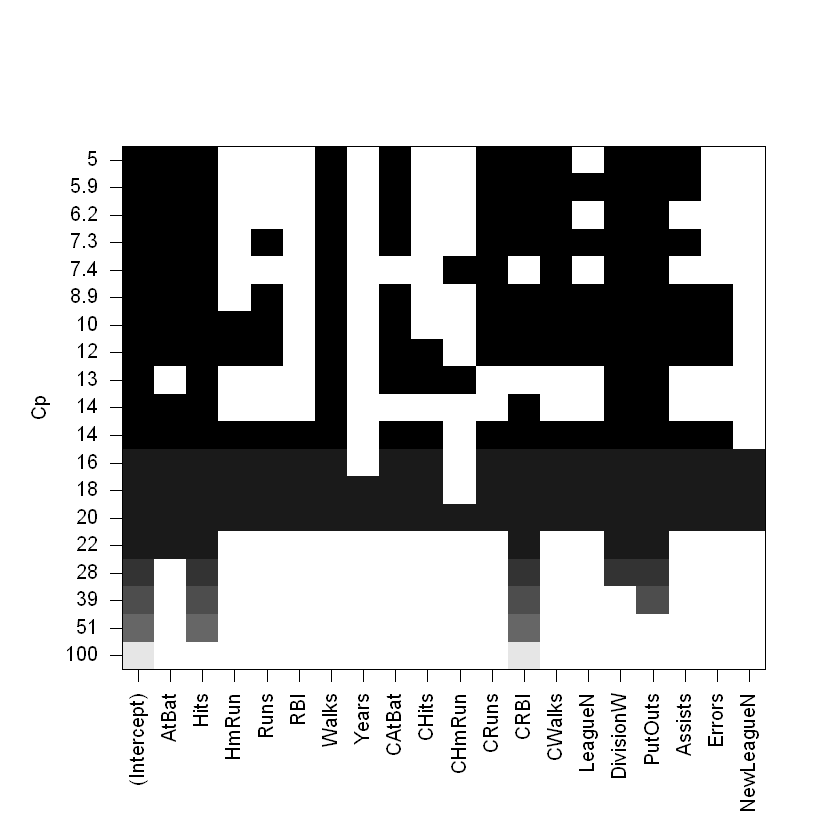

In [21]:
#pattern picture
#y-axis == cp; small is good
#on top, it is the best, corresponds to 10
#as it goes down, it gets worse and worse

#bad cp == correspond to models w/ all variables in (bottom of plot)

#black squares == vars are in
#white squares == vars are out

plot(regfit.full2, scale='Cp')

In [22]:
#we chose model 10
# ask for coefficients of 10 variables in model 
coef(regfit.full2,10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

### Forward Stepwise Method

greedy algorithm (best next variable)

nested sequence of models == less adventourous search

adds predictors that improve the model the most


Here we use the 'regsubsets' function but specify the 'method="forward"' option:

In [117]:
regfit.fwd<-regsubsets(Salary~.,
        data=Hitters,nvmax=19,method='forward')
#each new model includes predictior of previous model
reg.summary2 <- summary(regfit.fwd)
#reg.summary2

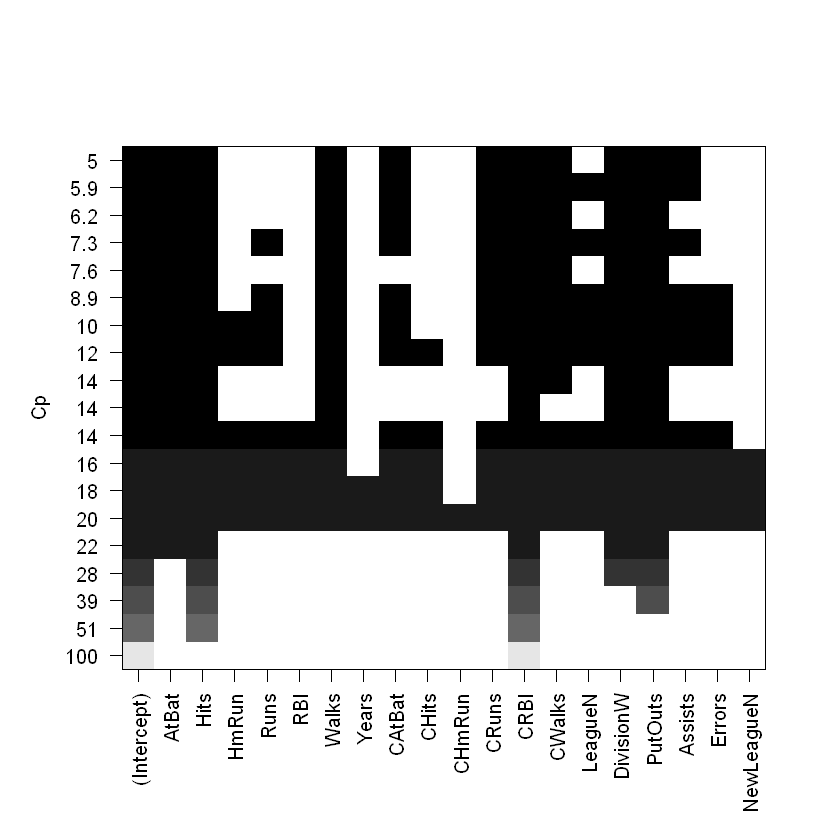

In [118]:
#similar to best subsets
#low cp similar
plot(regfit.fwd,scale='Cp')

Warning message in plot.window(...):
""xlap" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""xlap" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xlap" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xlap" is not a graphical parameter"
Warning message in box(...):
""xlap" is not a graphical parameter"
Warning message in title(...):
""xlap" is not a graphical parameter"


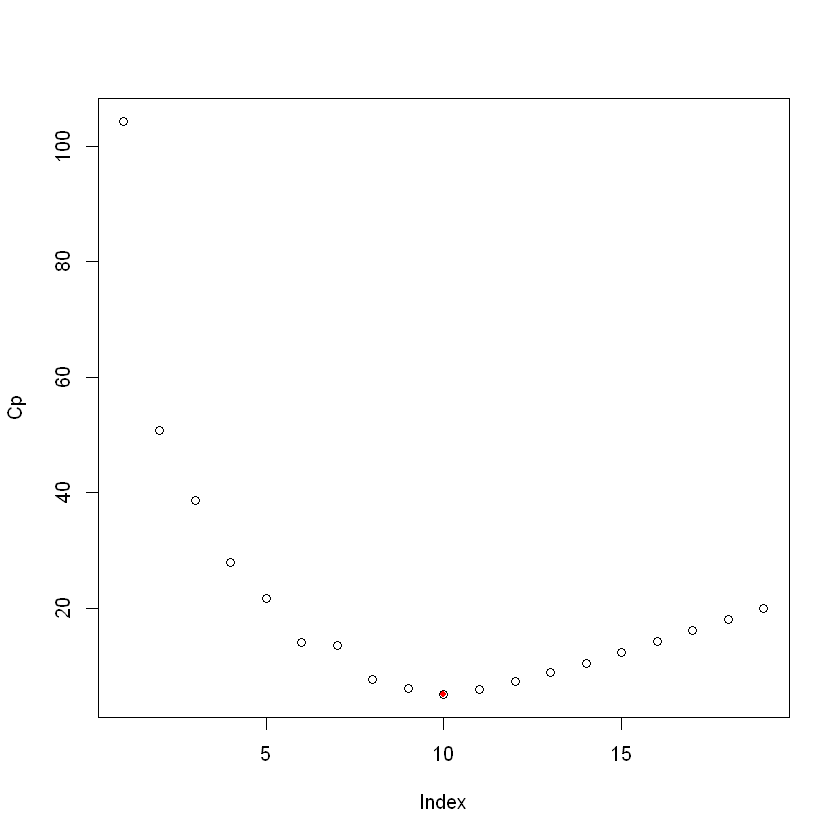

In [26]:
plot(reg.summary2$cp,xlap='Number of Variables',ylab='Cp')
points(10,reg.summary2$cp[10],pch=20,col='red')

Let's do the same analysis for BIC to determine the best model

In [27]:
names(regfit.fwd)

[1] "np"        "nrbar"     "d"         "rbar"      "thetab"    "first"    
 [7] "last"      "vorder"    "tol"       "rss"       "bound"     "nvmax"    
[13] "ress"      "ir"        "nbest"     "lopt"      "il"        "ier"      
[19] "xnames"    "method"    "force.in"  "force.out" "sserr"     "intercept"
[25] "lindep"    "nullrss"   "nn"        "call"

In [32]:
names(reg.summary2)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [39]:
which.min(reg.summary2$bic)

[1] 6

Warning message in plot.window(...):
""xlap" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""xlap" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xlap" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xlap" is not a graphical parameter"
Warning message in box(...):
""xlap" is not a graphical parameter"
Warning message in title(...):
""xlap" is not a graphical parameter"


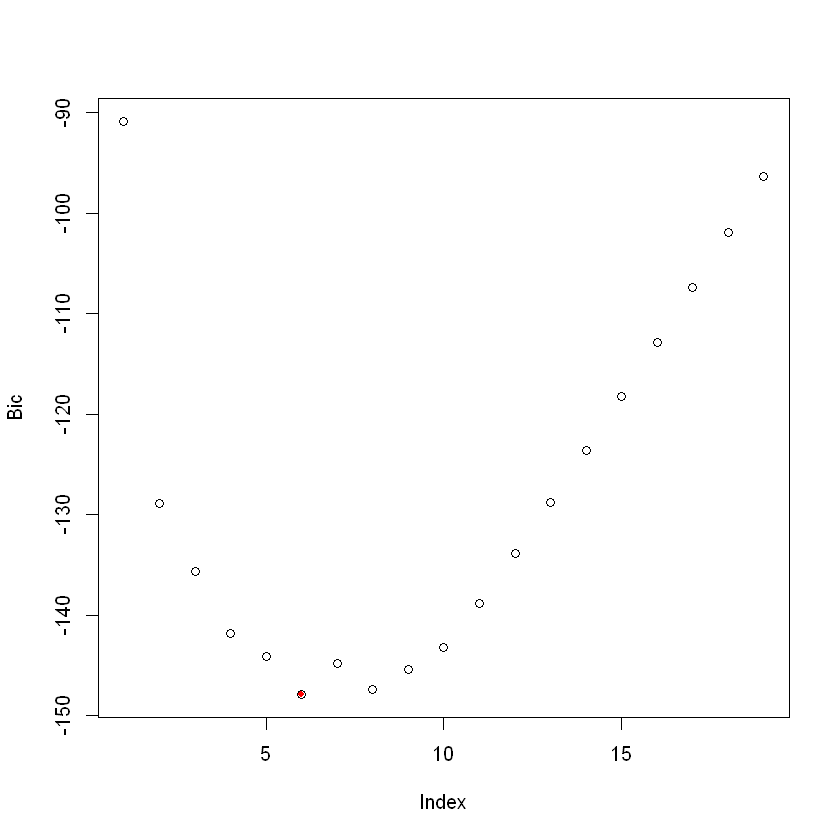

In [38]:
plot(reg.summary2$bic,xlap='Number of Variables',ylab='Bic')
points(6,reg.summary2$bic[6],pch=20,col='red')

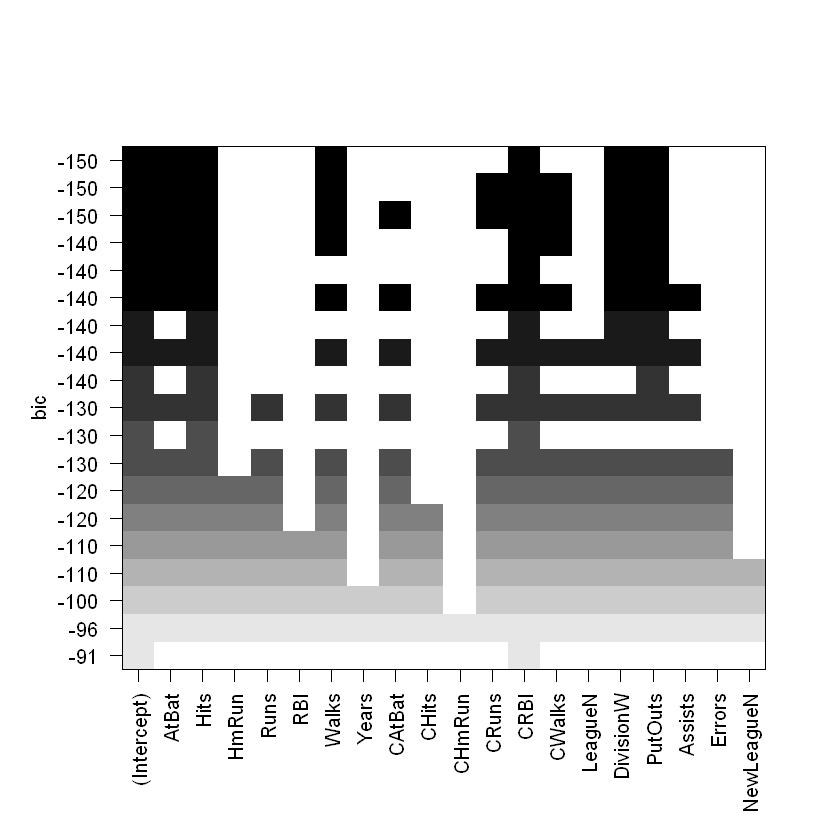

In [33]:
plot(regfit.fwd,scale='bic')

In [ ]:
plot(regfit.fwd,scale='Cp')

### Model Selection Using a Validation Set

Let's make a training and validation set, so that we can choose a good subset model

Slightly different approach from what was done in the book

Create a Training set

In [374]:
dim(Hitters)

[1] 263  20

In [379]:
#keeps numbers consistent eberytime
#good for repeated sampling
#can set to any number
#does not matter
set.seed(1)
#seq -- makes sequence to specified number
#sample--random sample (sample from sequence)
#sample of size 180
#do not replace values once taken out
#only 180 samples for training set (2/3)
train=sample(seq(263),180,replace=FALSE)
train

[1] 167 129 187  85  79 213  37 105 217 110 229 165  34 106 126  89 172 207
 [19]  33  84 163  70  74  42 166 111 148 156  20  44 121  87 242 233  40 247
 [37]  25 119 198 122  39 179 240 134  24 160  14 130  45 146  22 206 193 115
 [55] 104 231 208 209 103  75  13 253 176 248  23 254 244 205  29 141 150 236
 [73] 108  48 245 215 149  31 102 145  73 232  83 118  90 190 107  64 196  60
 [91]  51 251 138 262  43  26 143 195 152 178 223 219 202 181 222 169   1 239
[109]  78 211 246  28 116 257  61 113  86  71 225  99 173 234  49 256 174 194
[127]  50 135 238 235 230 263  53 100 164  65 142 175 140 124 224  77 159  98
[145]  66  19  17 228 204 186  35 144  46 180 109 210  16 161   9 137  92 162
[163]  10 259  32 243  95 154  93  12 255 177  15   2 128  67 183 117 197   5

In [380]:
length(train)

[1] 180

In [381]:
sum(train)/mean(train)

[1] 180

In [147]:
#fit training set
regfit.fwd2=regsubsets(Salary~.,
        #df Hitters, but indexed by rows in training set
        data=Hitters[train,],
        nvmax=19,
        method='forward')

make predictions on observation not used for training

19 models, so we set up some vectors to record the errors

Have to work b/c no predict method for 'regsubsets'


In [148]:
#validation errors on remaining of data
#19 subsets b/c 19 vars
#set up vector w/ 19 slots
val.errors=rep(NA,19)

In [85]:
?model.matrix

In [149]:
#matrix corresponding to validation set

#Salary as a function of all other vars
x.test=model.matrix(Salary~.,
        #indices excluded (notice negative index)
        data=Hitters[-train,])

In [100]:
#practice code to see coefficinets for all 19 vars
# for (i in 1:19){
#     print(coef(regfit.fwd,i))
#     #print(i)
# }

In [150]:
# #each index corresponds to the number var
# coef(regfit.fwd2,1)
# coef(regfit.fwd2,2)
# coef(regfit.fwd2,3)

(Intercept)        CRBI 
 241.800230    0.958799

(Intercept)       Walks        CRBI 
 10.3909138   6.9619452   0.7778421

(Intercept)        Walks         CRBI    DivisionW 
 116.3421387    6.7810155    0.7516748 -177.8700862

In [171]:
#make predictions for each model
for(i in 1:19){
    #coef function to extract coefficients
    #size id == 1
    #i is going to index the size (# of vars)
    #loop and do it for each size
    coefi=coef(regfit.fwd2,id=i)
    #no predict function for subsets
    #do it ourselves
    #to get right elements of x-test, 
    #index columns by names of coefficient vector
    #subset of columns that correspond to vars in coeffcient vector
    #multiply matrix by coefficient vector
    #gets predictions
    pred=x.test[,names(coefi)]%*%coefi
      #B1*X1..BpXp
    #compute MSE == Hitters$Salary[-train]-pred
    #== mean((y - y-hat)^2)
    val.errors[i] <- mean((Hitters$Salary[-train]-pred)^2) #MSE for each model
}

In [180]:
#val.errors

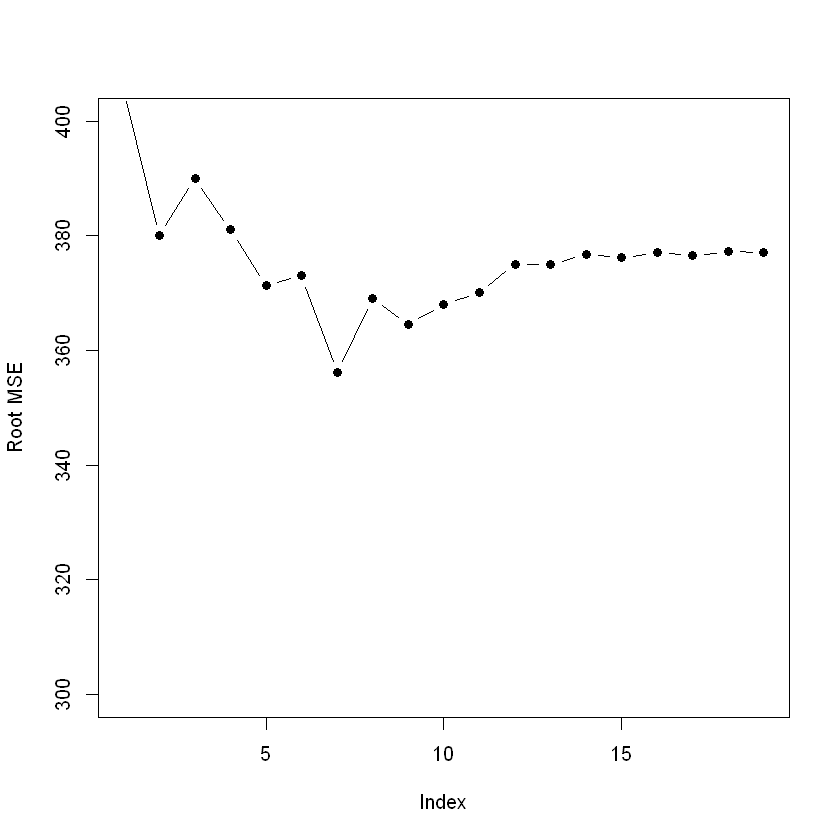

In [205]:
plot(sqrt(val.errors), ylab='Root MSE',
    ylim=c(300,400),pch=19, type='b')

In [ ]:
#c(300,400)

DOES NOT WORK; COULD BE DUE TO SEED

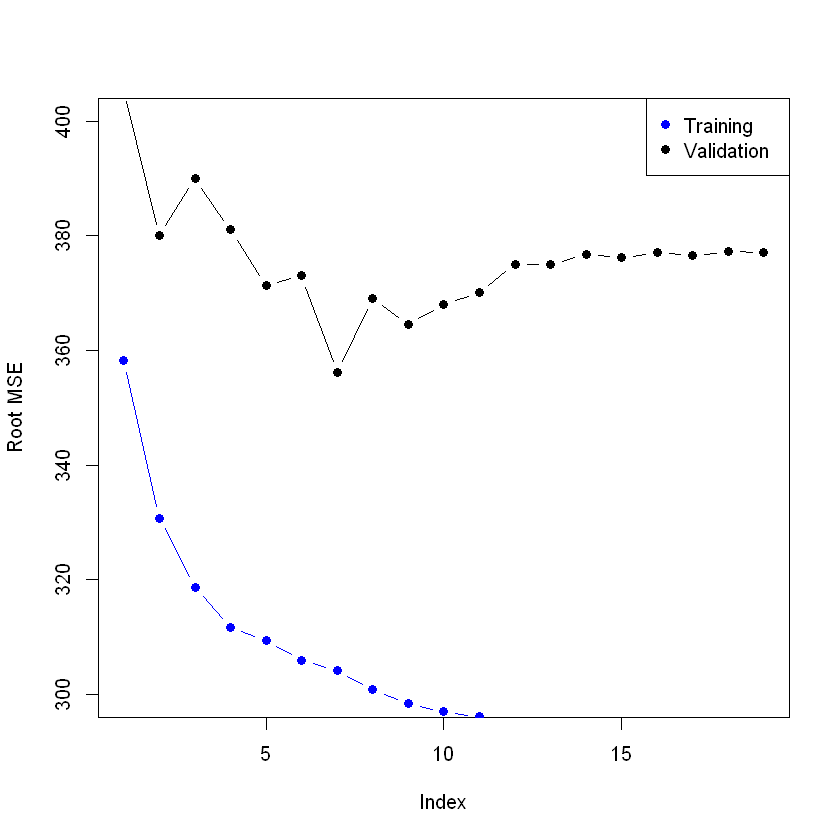

In [206]:
#Note, I a get different plot
#maybe b/c of set.seed?
#however, min still around5!


#does NOT WORK
#plot root MSE
#jumpy b/c not much n in validation set (>90)
plot(sqrt(val.errors), ylab='Root MSE',ylim=c(300,400),pch=19, type='b')

#put RSS model in the same plot
#regfit.fwd$rss[-1] == remove first (y-intercept);null model


#RSS (should overlap at 5); 
#monotone decreasing == the more predictors, the more it decreases
#b/c stepwise == every added predictor aids model
points(sqrt(regfit.fwd2$rss[-1]/180),col='blue', pch=19,type='b')

#annotate w/ a legend
legend("topright",legend=c('Training','Validation'),col=c('blue','black'),pch=19)

Training error goes down monotonically as the model gets bigger, but not so for the validation error

In [184]:
#object -- subsets to predict from
#new data
#id of the model
#calll == used to create it; exctract formula w/ [[]]
#then make model matrix from it
#extract coefficients and multiply by matrix
#creates subsets of original data

predict.regsubsets=function(object,newdata,id,...){
  form=as.formula(object$call[[2]])
  mat=model.matrix(form,newdata)
  coefi=coef(object,id=id)
  xvars=names(coefi)
  mat[,xvars]%*%coefi
  }

### Model Selection and Cross Validation

preferred by authors

10-fold validation

MAKE FOLDS 

In [249]:
set.seed(11)

#each observation == fold number (10 folds)
#vector from 1 to 10, length the number of hitters
#then shuffle (sample function)
folds=sample(rep(1:10, length=nrow(Hitters)))
#our random assignment
#of folds to each of the observations in hitters.
#balanced (26-27 in each fold)
folds

[1] 10  4  4  4  3  7 10  8 10  3  4  2  2  1  1  5  3  3  5  9  5  2  7  3  8
 [26]  7  4  6  7  7  7 10  2  6  6  1  8  8 10  1  8  3  7 10  1  6 10  3  8  7
 [51]  9  3  6  2  5  6  5  5  2  6  4  7 10  7  1  8  1  2  8  2  1  8  2  6  4
 [76]  3  1  1  5  1  2 10  5  8  8  3  9  8  3  6  1  9  5  9  9  8  8  6  8 10
[101]  9  8  7  8 10  1  3  1 10  5  2  5  2  4  4 10  3  6  9  7  4  3  9  8 10
[126]  7  5  9 10  4  7  4  1  9  4  5  6  8 10  6  7  1 10  6  4  6  7  1  9  4
[151]  2  1  7  2  5  7 10  7  9  6  9  5  5  4 10  4  2 10  9  3  3  2  9  2  6
[176]  9  4  3  9  9  9  4  6  1  7  8  5  8 10  6  9  8  9  1  5  3  3  1  7  1
[201]  2  9  1  9 10  3 10  3  4  6  8  2  9  5  7  2 10  4  1  6 10  3  5  5  3
[226]  5  7  3  6  5  4  1  3  7  1  5  2  9  4  6  8  3  2  4  5 10  8  5  2  2
[251]  2  6  3  4  7  2  6  4  8  7  1  2  6

In [213]:
class(folds)

[1] "integer"

In [250]:
#very balanced
table(folds)

folds
 1  2  3  4  5  6  7  8  9 10 
27 27 27 26 26 26 26 26 26 26 

MATRIX FOR ERRORS

In [251]:
#10 rows (for each fold)
#19 columns (for vars)
cv.errors=matrix(NA,10,19)

FIT 10 MODELS; PREDICT 19 SUBSAMPLES

FIT TRAINING DATA (NOT EQUAL TO K)

USE PREDICT FUCNTION WE CREATED

TEST SET IS DATA EQUAL TO K 

TEST DATA FOR EACH SUBSET SIZE i

MSE OF PREDICTIONS FOR ALL i and K

In [252]:
#fits 10 models
#predictions for 19 subsets of each

#look at folds
for(k in 1:10){
    #fit regsubsets model
    best.fit=regsubsets(Salary~., 
    #training data == all observations
    #whose fold ID not equal to k
    #train on all but that one
    data=Hitters[folds!=k,],nvmax=19,
    method='forward')
    #look at subsets
    for(i in 1:19){
        #predict using training data on test data
        #where test data is k
        #use our own predict function from earlier
        #nwe data is test data
        #for each subset size 1 == given to function by id
        pred=predict(best.fit,Hitters[folds==k,],id=i)
        #MSE
        cv.errors[k,i]=mean((Hitters$Salary[folds==k]-pred)^2)
    }
}

SRT-MSE -- AVG MSE FOR EACH COLUMN (PREDICTOR)

In [245]:
#apply mean function to columns 
#each row MSE for a row
#avg down the columns 
#use sqrt root to get the root mean squared error
rmse.cv=sqrt(apply(cv.errors,2,mean))

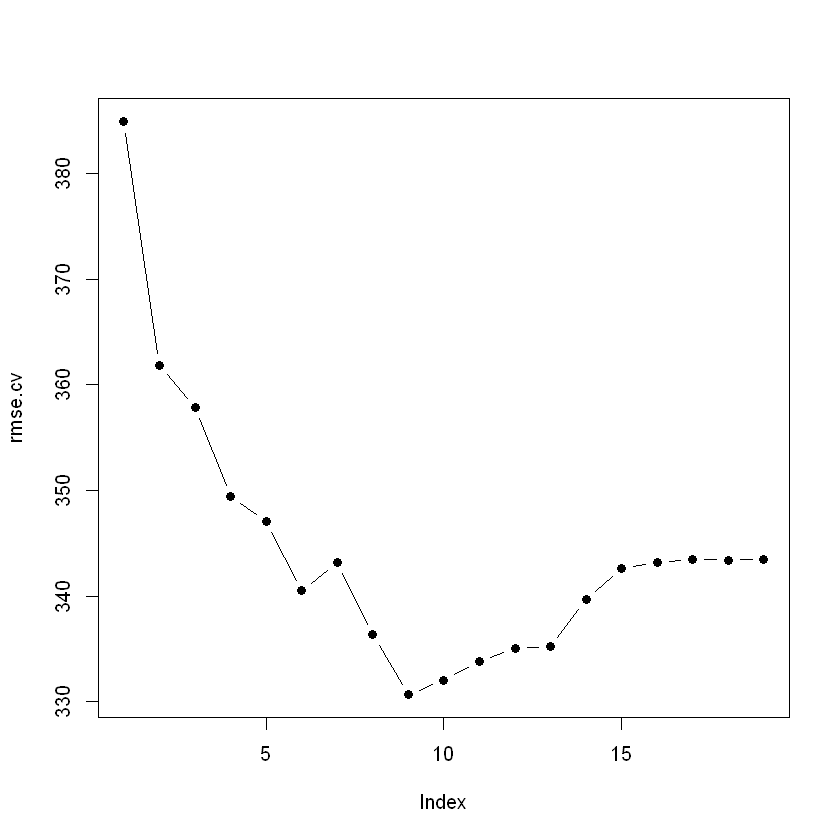

In [253]:
#plot slightly diff
#pretty sure has to w/ seed function

#10-fold CV curve, less jumpy than validation 
#avg over full training set (errors)
#done fold by fold, so smoother
#favors models of size 11-12
plot(rmse.cv,pch=19,type='b')

### Ridge Regression and Lasso

We will use the package 'glment', which does not use the model formula language, so we will set up on 'x' and 'y

In [270]:
#?setRepositories

In [269]:
#install.packages('glmnet',repos='<a class="vglnk" href="http://cran.us.r-project.org" rel="nofollow"><span>http</span><span>://</span><span>cran</span><span>.</span><span>us</span><span>.</span><span>r</span><span>-</span><span>project</span><span>.</span><span>org</span></a>')

In [268]:
#install.packages("glmnet", lib = "C:\\Program Files\\R\\R-3.6.2\\library")

In [266]:
install.packages('glmnet') 

Installing package into 'C:/Users/Diego/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependencies 'iterators', 'foreach', 'shape'




package 'iterators' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Diego\AppData\Local\Temp\Rtmpqmbhm3\downloaded_packages


In [267]:
#authors created fitting lasso/ridge models etc.
#loss functions
#does not use a formula language
library(glmnet)

Loading required package: Matrix

Loaded glmnet 3.0-2




In [362]:
#required to give it a matrix x-predictors
x=model.matrix(Salary~.-1,data=Hitters)
#y-responses
y=Hitters$Salary

In [339]:
#x

In [363]:
class(x)

[1] "matrix"

In [364]:
class(y)

[1] "numeric"

In [365]:
length(y)

[1] 263

In [367]:
#y[-train]

numeric(0)

In [ ]:
# length(x)

In [341]:
#x[train]

In [343]:
#x[-train]

In [344]:
#length(x[-train])

[1] 4997

Fit Ridge-regression model

call 'glmnet' 

can also use 'cv.glmnet' function which will do the cross-validation for us

In [399]:
?cv.glmnet

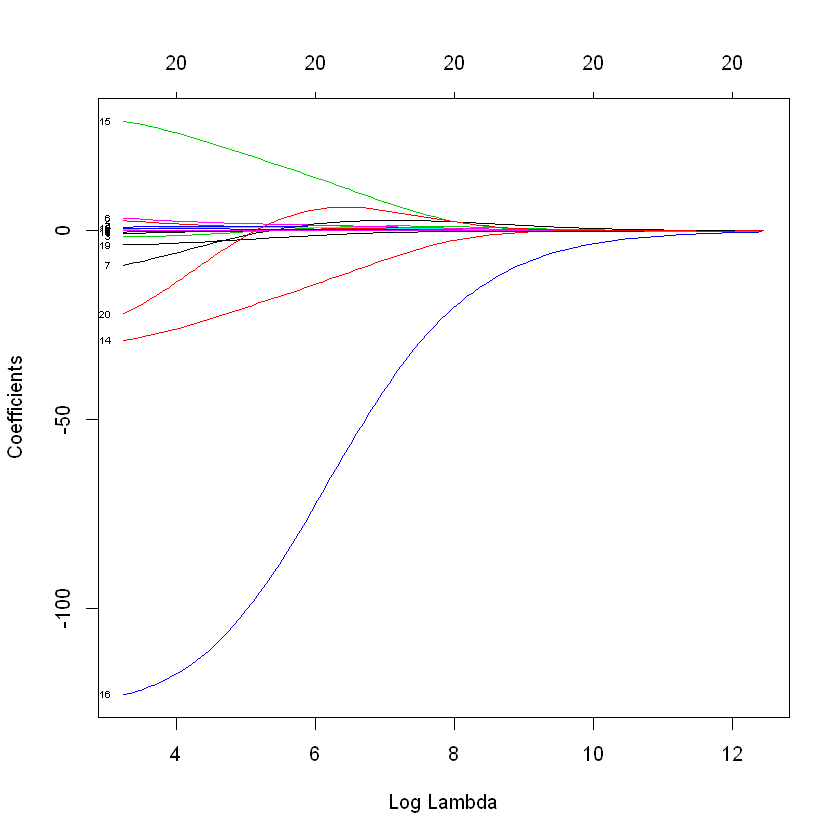

In [284]:
#glmnet has a an alpha argument
#alpha equals 1 is lasso
#alpha equals 0 is ridge.
#look on the help file

#RIDGE
fit.ridge=glmnet(x,y,alpha=0)

#plotting coefficients
#models penalized by RSS of coeffieicnets, controlled by lambda
#RSS + LAMBDA*summation of Bj**2

#if lambda (penalty) big, you want SS of coefficinets (Bj to be small)
#that will shrink the coefficients toward zero
#Lmabda very big == coefficinets 0

#as lambda increaes, all coefficinets are 0
#since log, lambda in the 100s\
plot(fit.ridge,xvar='lambda',label=TRUE)

In [274]:
#summary(fit.ridge)

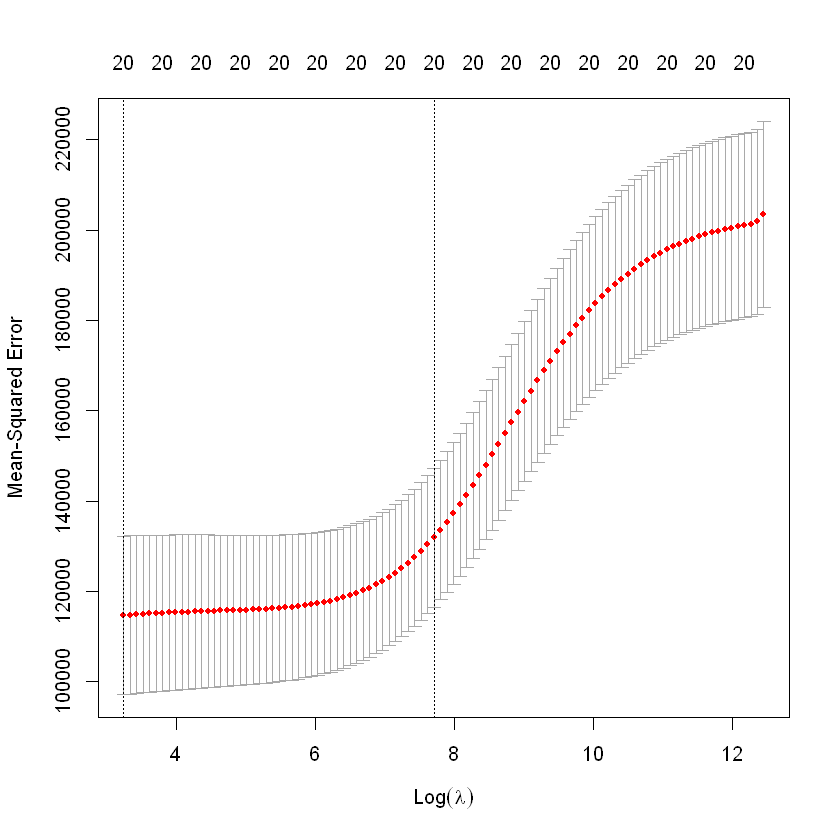

In [285]:
#  cross validation for you, k-fold cross
# validation.
# And so we'll run CV.ridge, stand by default 10-fold cross
# validation, and then we can do a plot.
#10-fold
cv.ridge=(cv.glmnet(x,y,alpha=0))
# plot of the cross validated mean squared error
# it goes, and you see it dips down 
#In the beginning, the mean squared error is very high,
# and the coefficients are restricted to be too small,
# and then at some point, it kind of levels off.

#coefficinets too small oon right side of plot, hence high MSE
#left vertical line == min
#right vertical line == 1 sd of min (more restricted model)
#top says there is 19 varsiables
plot(cv.ridge)

### LASSO

use alpha =1 

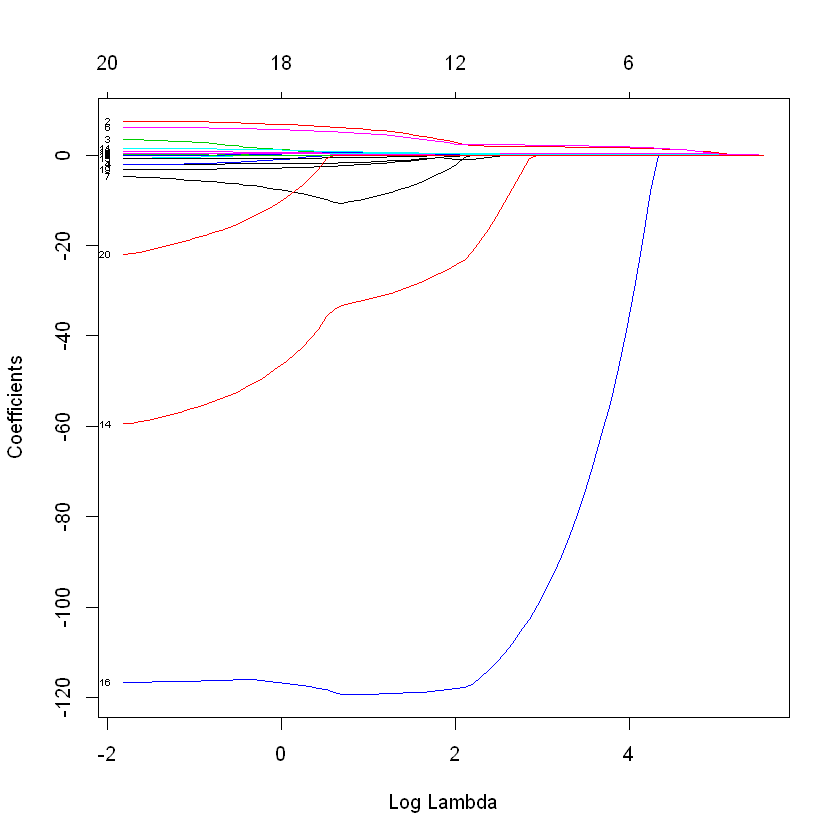

In [286]:
#RSS + LAMBDA*summation of |Bj| (absolute values of coeffieicents); makes some 0


fit.lasso=glmnet(x,y)

#high Lambda (right of plot) == all Bs ==0
#top of plot == how many non-zero vars in plot
#shrinkage and variable selection
plot(fit.lasso,xvar='lambda',label=TRUE)

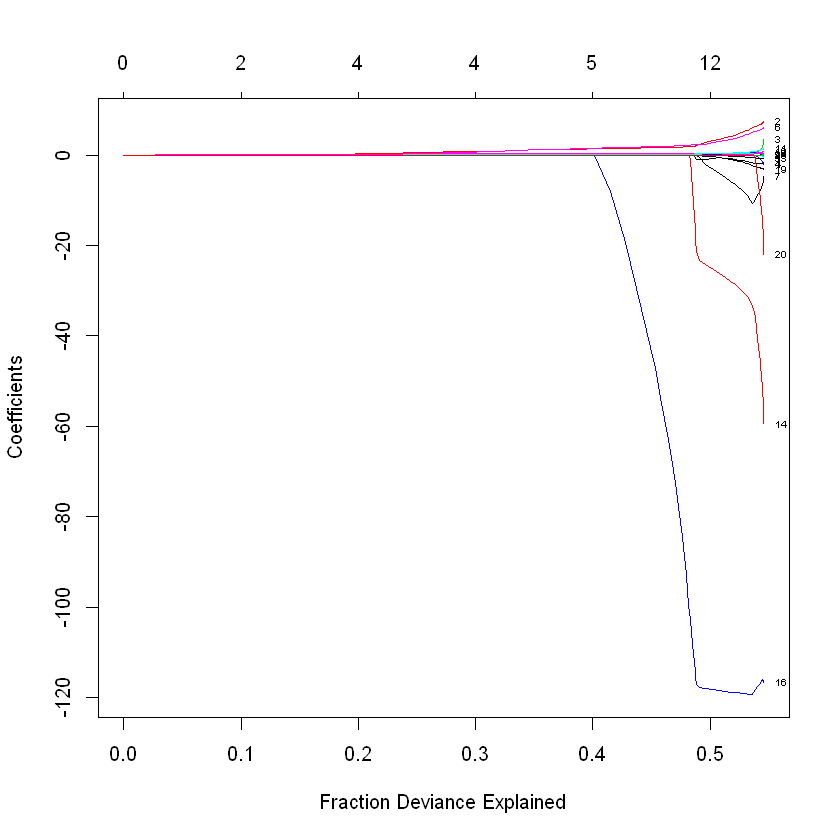

In [287]:
# percentage of deviance
# explained, or percentage of, in case of regression, your
# sum of squares explained, which is the 

#r squared ==
# lot of the r squared
# was explained for quite heavily shrunk coefficients.
# And towards the end, with a relatively small increase in r
# squared from between 0.4 and 0.5,
# coefficients grow very large.

# indication that the end of the
# path is overfitting.
plot(fit.lasso,xvar='dev',label=TRUE)

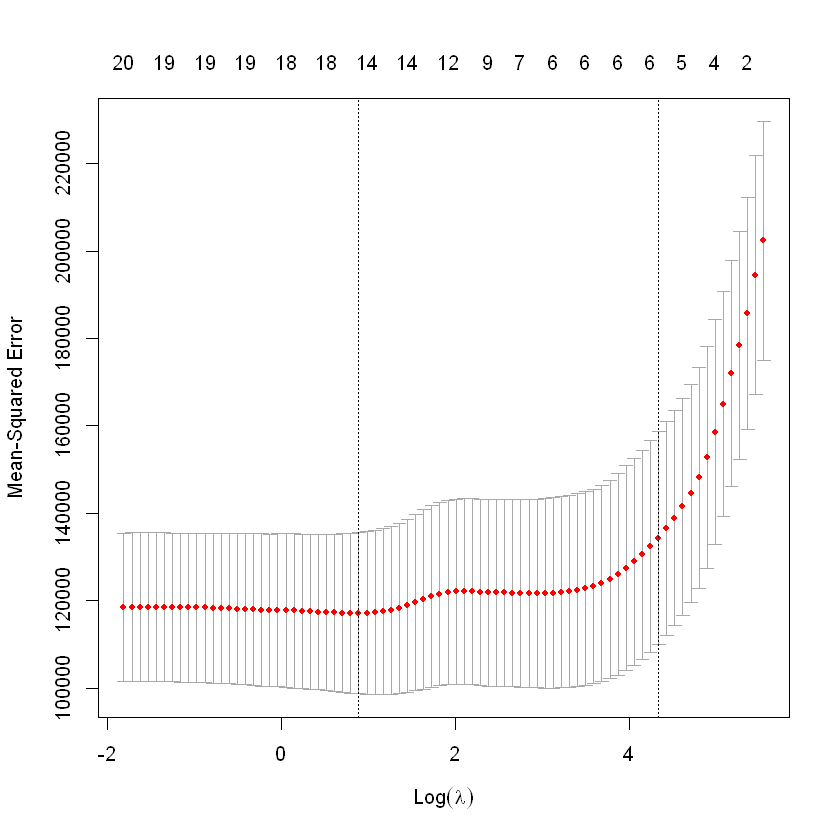

In [288]:
#cross validation
cv.lasso=cv.glmnet(x,y)
#the minimum cross validation areas at full size 13
#within one standard error, 
#we have a model of size 5
#make choice based on that
plot(cv.lasso)

Show which Model siz is best

Show which coefficients for which bars

In [361]:
#coefficient extractor
#coefficient vector corresponding to best model
#Model of size 5
#coef(cv.lasso)

Suppose we want to use our earlier train/validaion division to select the 'lambda' for the lasso

Easy to do

In [384]:
#already have tr/tst splits
lasso.tr=glmnet(x[train,],y[train])
#df == non-zero coefficients
#%dev of deviance explained
#lambda for that fit
lasso.tr


Call:  glmnet(x = x[train, ], y = y[train]) 

   Df    %Dev  Lambda
1   0 0.00000 262.100
2   1 0.05919 238.800
3   1 0.10830 217.600
4   1 0.14910 198.300
5   2 0.19720 180.600
6   3 0.23940 164.600
7   3 0.27450 150.000
8   3 0.30370 136.700
9   3 0.32790 124.500
10  3 0.34800 113.500
11  4 0.36500 103.400
12  5 0.38770  94.190
13  6 0.40900  85.820
14  6 0.42730  78.200
15  6 0.44250  71.250
16  6 0.45510  64.920
17  6 0.46550  59.150
18  6 0.47420  53.900
19  6 0.48140  49.110
20  6 0.48740  44.750
21  6 0.49240  40.770
22  6 0.49650  37.150
23  6 0.49990  33.850
24  7 0.50280  30.840
25  7 0.50510  28.100
26  8 0.50710  25.610
27  8 0.50940  23.330
28  8 0.51120  21.260
29  8 0.51280  19.370
30  8 0.51410  17.650
31  8 0.51520  16.080
32  8 0.51600  14.650
33  8 0.51680  13.350
34  9 0.51750  12.170
35  9 0.51990  11.080
36 10 0.52230  10.100
37 10 0.52440   9.202
38 11 0.52640   8.385
39 11 0.52820   7.640
40 11 0.52970   6.961
41 11 0.53090   6.343
42 11 0.53190   5.779
43 12 0

In [346]:
class(lasso.tr)

[1] "elnet"  "glmnet"

In [347]:
length(lasso.tr)

[1] 12

In [348]:
lasso.tr[length(lasso.tr)]

$nobs
[1] 264

DOES NOT WORK???

plot looks much different

In [385]:
#predictions on our left out data == -train
pred=predict(lasso.tr,x[-train,])
dim(pred)

[1] 83 83

In [332]:
#class(x[-train,])

In [333]:
#length(x[-train,])

In [334]:
#min(x[-train,])

In [358]:
#length(y[-train])

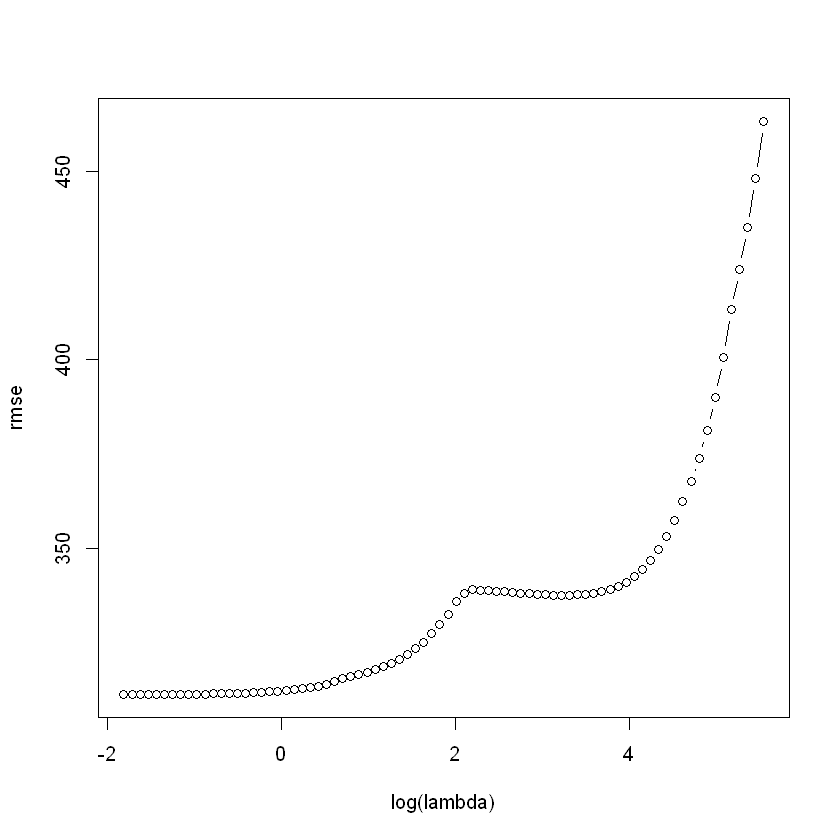

In [383]:
#gave y as a vector
#Recycles y vector 89 times, column wise
#compute sum of squared errors
#apply to compute the emans in each column of the squared errors
#square root
rmse=sqrt(apply((y[-train]-pred)^2,2,mean))

#validation curve
#left == overfit
#right == underfit
#lowest == sweetspot
plot(log(lasso.tr$lambda),rmse,type='b',xlab='log(lambda)')

In [388]:
#extract best lambda

# I do this by indexing.
# There's a component on the glmnet object called lambda,
# so this extracts that component.
# Then our index that by order of rmac, so that's our root
# meet squared error.
# Order puts them in ascending order, and so we want the
# index of the first or the smallest value. the best lambda
lam.best=lasso.tr$lambda[order(rmse)[1]]
#should be 19.98
lam.best

[1] 0.1848988

In [389]:
#look at coefficients corresponding to that variable
#give us subset of those coeficicents


# And the dots correspond to the zero, so those are the ones
# that are missing.
# And so they're not missing, but they're zeroes.
# This is actually printed out in what's known as sparse
# matrix format.
# Which means only the non-missing values--
# only the non-zero values are actually recorded.
coef(lasso.tr,s=lam.best)

21 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  350.6297539
AtBat         -1.2578168
Hits           4.9886233
HmRun         -1.5697653
Runs          -4.6112461
RBI            1.4805894
Walks          6.4727964
Years        -15.1666096
CAtBat        -0.2406861
CHits          0.7827135
CHmRun         1.2317185
CRuns          1.0301163
CRBI           0.2721197
CWalks        -0.5677139
LeagueA     -133.8315303
LeagueN        .        
DivisionW   -151.8512178
PutOuts        0.2936503
Assists        0.4126227
Errors        -4.7895362
NewLeagueN  -101.9146379

### Fix above later!

### THE END - CODE FROM BOOK (does not appear to work on the plot portion)

In [175]:
set.seed(1)

train=sample(c(TRUE,FALSE), nrow(Hitters),rep=TRUE)

test=(!train)

regfit.best=regsubsets(Salary~.,data=Hitters[train,],nvmax=19)

test.mat=model.matrix(Salary~.,data=Hitters[test,])

val.errors=rep(NA,19)

for(i in 1:19){
   coefi=coef(regfit.best,id=i)
   pred=test.mat[,names(coefi)]%*%coefi
   val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}

In [176]:
val.errors

[1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2

In [177]:
which.min(val.errors)

[1] 7

In [178]:
coef(regfit.best,10)

(Intercept)        AtBat         Hits        HmRun        Walks       CAtBat 
  71.8074075   -1.5038124    5.9130470  -11.5241809    8.4349759   -0.1654850 
       CRuns         CRBI       CWalks    DivisionW      PutOuts 
   1.7064330    0.7903694   -0.9107515 -109.5616997    0.2426078

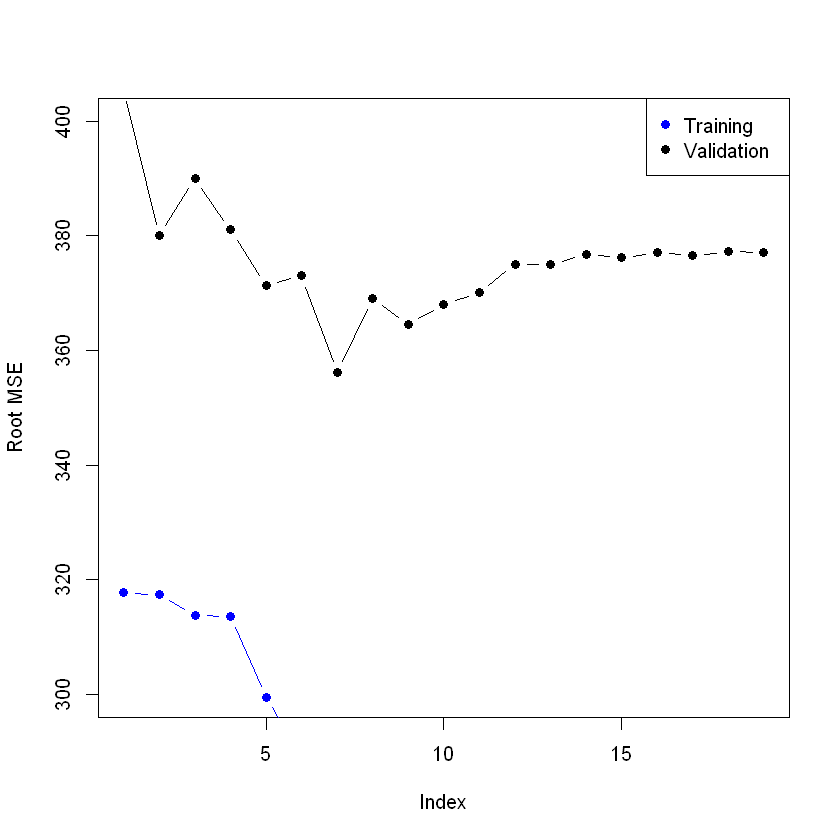

In [182]:
#plot root MSE
#jumpy b/c not much n in validation set (>90)
plot(sqrt(val.errors), ylab='Root MSE',ylim=c(300,400),pch=19, type='b')

#put RSS model in the same plot
#regfit.fwd$rss[-1] == remove first (y-intercept);null model


#does NOT WORK
#RSS (should overlap at 5); 
#monotone decreasing == the more predictors, the more it decreases
#b/c stepwise == every added predictor aids model
points(sqrt(regfit.best$rss[-1]/180),col='blue', pch=19,type='b')

#annotate w/ a legend
legend("topright",legend=c('Training','Validation'),col=c('blue','black'),pch=19)

In [179]:
predict.regsubsets=function(object,newdata,id,...){
  form=as.formula(object$call[[2]])
  mat=model.matrix(form,newdata)
  coefi=coef(object,id=id)
  xvars=names(coefi)
  mat[,xvars]%*%coefi
  }

In [ ]:
regfit.best=regsubsets(Salary~.,data=Hitters,nvmax=19)
